In [46]:
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget

In [47]:
file_to_load = "csv_files/COVID_19_time_series_clean_complete_All_Data.csv"
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df = pd.DataFrame(covid_19)
del confirmed_19_df["Unnamed: 0"]
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [48]:
confirmed_19_df.dtypes

Date               object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
New cases           int64
New deaths          int64
New recovered       int64
dtype: object

In [49]:
# Date from sting to datetime
confirmed_19_df['Date'] = pd.to_datetime(confirmed_19_df['Date'])
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [50]:
confirmed_19_df_groupby = confirmed_19_df.set_index("Date").groupby("Country/Region").resample("M")
confirmed_19_df_groupby

Global By Country and Month

In [51]:
covid_new_cases_by_month = confirmed_19_df_groupby.sum()
del covid_new_cases_by_month["Confirmed"]
del covid_new_cases_by_month["Recovered"]
del covid_new_cases_by_month["Active"]
del covid_new_cases_by_month["Deaths"]
covid_new_cases_by_month

New cases  New deaths  New recovered
Country/Region Date                                            
Afghanistan    2020-01-31          0           0              0
               2020-02-29          1           0              0
               2020-03-31        174           4              5
               2020-04-30       1952          60            255
               2020-05-31      13081         194           1068
...                              ...         ...            ...
Zimbabwe       2021-01-31      19521         854          14794
               2021-02-28       2701         246           6622
               2021-03-31        793          60           2020
               2021-04-30       1375          44            926
               2021-05-31         24           3             22

[3264 rows x 3 columns]

Quarterly Amounts - New Cases, Deaths, and Recoved 

In [52]:
# covid_new_cases_by_month.to_csv('COVID_19_time_series_clean_by_country_byDay_conf_deaths_recovered.csv')

In [53]:
confirmed_19_df_groupby = confirmed_19_df.set_index("Date").resample("M")
confirmed_19_df_groupby
covid_new_cases_by_month_v2 = confirmed_19_df_groupby.sum()
del covid_new_cases_by_month_v2["Confirmed"]
del covid_new_cases_by_month_v2["Recovered"]
del covid_new_cases_by_month_v2["Active"]
del covid_new_cases_by_month_v2["Deaths"]
covid_new_cases_by_month_v2

,New cases,New deaths,New recovered
Date,,,
2020-01-31,9370,196,192
2020-02-29,76086,2729,38101
2020-03-31,789811,41586,136328
2020-04-30,2437845,192893,815937
2020-05-31,2912776,137621,1595570
2020-06-30,4274173,133145,2695284
2020-07-31,7146963,167330,4985786
2020-08-31,7905849,175570,6435746
2020-09-30,8510721,163905,6831774


In [54]:
# covid_new_cases_by_month_v2.to_csv('COVID_19_time_series_clean_by_global_monthly.csv')

In [55]:
confirmed_19_df_groupby = confirmed_19_df.set_index("Date").resample("Q")
covid_new_cases_by_month_v3 = confirmed_19_df_groupby.sum()
del covid_new_cases_by_month_v3["Confirmed"]
del covid_new_cases_by_month_v3["Recovered"]
del covid_new_cases_by_month_v3["Active"]
del covid_new_cases_by_month_v3["Deaths"]
covid_new_cases_by_month_v3

,New cases,New deaths,New recovered
Date,,,
2020-03-31,875267,44511,174621
2020-06-30,9624794,463659,5106791
2020-09-30,23563533,506805,18253306
2020-12-31,49593997,810020,22980559
2021-03-31,45416660,991236,25613485
2021-06-30,23609484,386682,15958245


In [56]:
# covid_new_cases_by_month_v3.to_csv('COVID-19-time-series-clean-by-quarter.csv')

In [57]:
file_to_load = "csv_files/COVID_19_time_series_clean_complete_All_Data.csv"
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df_by_country = pd.DataFrame(covid_19)
del confirmed_19_df_by_country["Unnamed: 0"]
confirmed_19_df_by_country

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [58]:
# confirmed_19_df_by_country.index.list_values == ['2021-04-30']
filt = confirmed_19_df_by_country["Date"] == "2021-04-30"
confirmed_19_df_by_country[filt]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
89086,2021-04-30,Afghanistan,59745,2625,53206.0,3914.0,169,7,103
89087,2021-04-30,Albania,131085,2394,109338.0,19353.0,108,5,732
89088,2021-04-30,Algeria,122108,3253,85108.0,33747.0,242,9,168
89089,2021-04-30,Andorra,13232,125,12684.0,423.0,34,0,34
89090,2021-04-30,Angola,26652,596,23876.0,2180.0,221,2,270
...,...,...,...,...,...,...,...,...,...
89273,2021-04-30,Vietnam,2928,35,2516.0,377.0,18,0,0
89274,2021-04-30,West Bank and Gaza,296462,3249,272333.0,20880.0,861,18,1100
89275,2021-04-30,Yemen,6317,1226,2751.0,2340.0,23,4,20
89276,2021-04-30,Zambia,91586,1251,89933.0,402.0,53,1,81


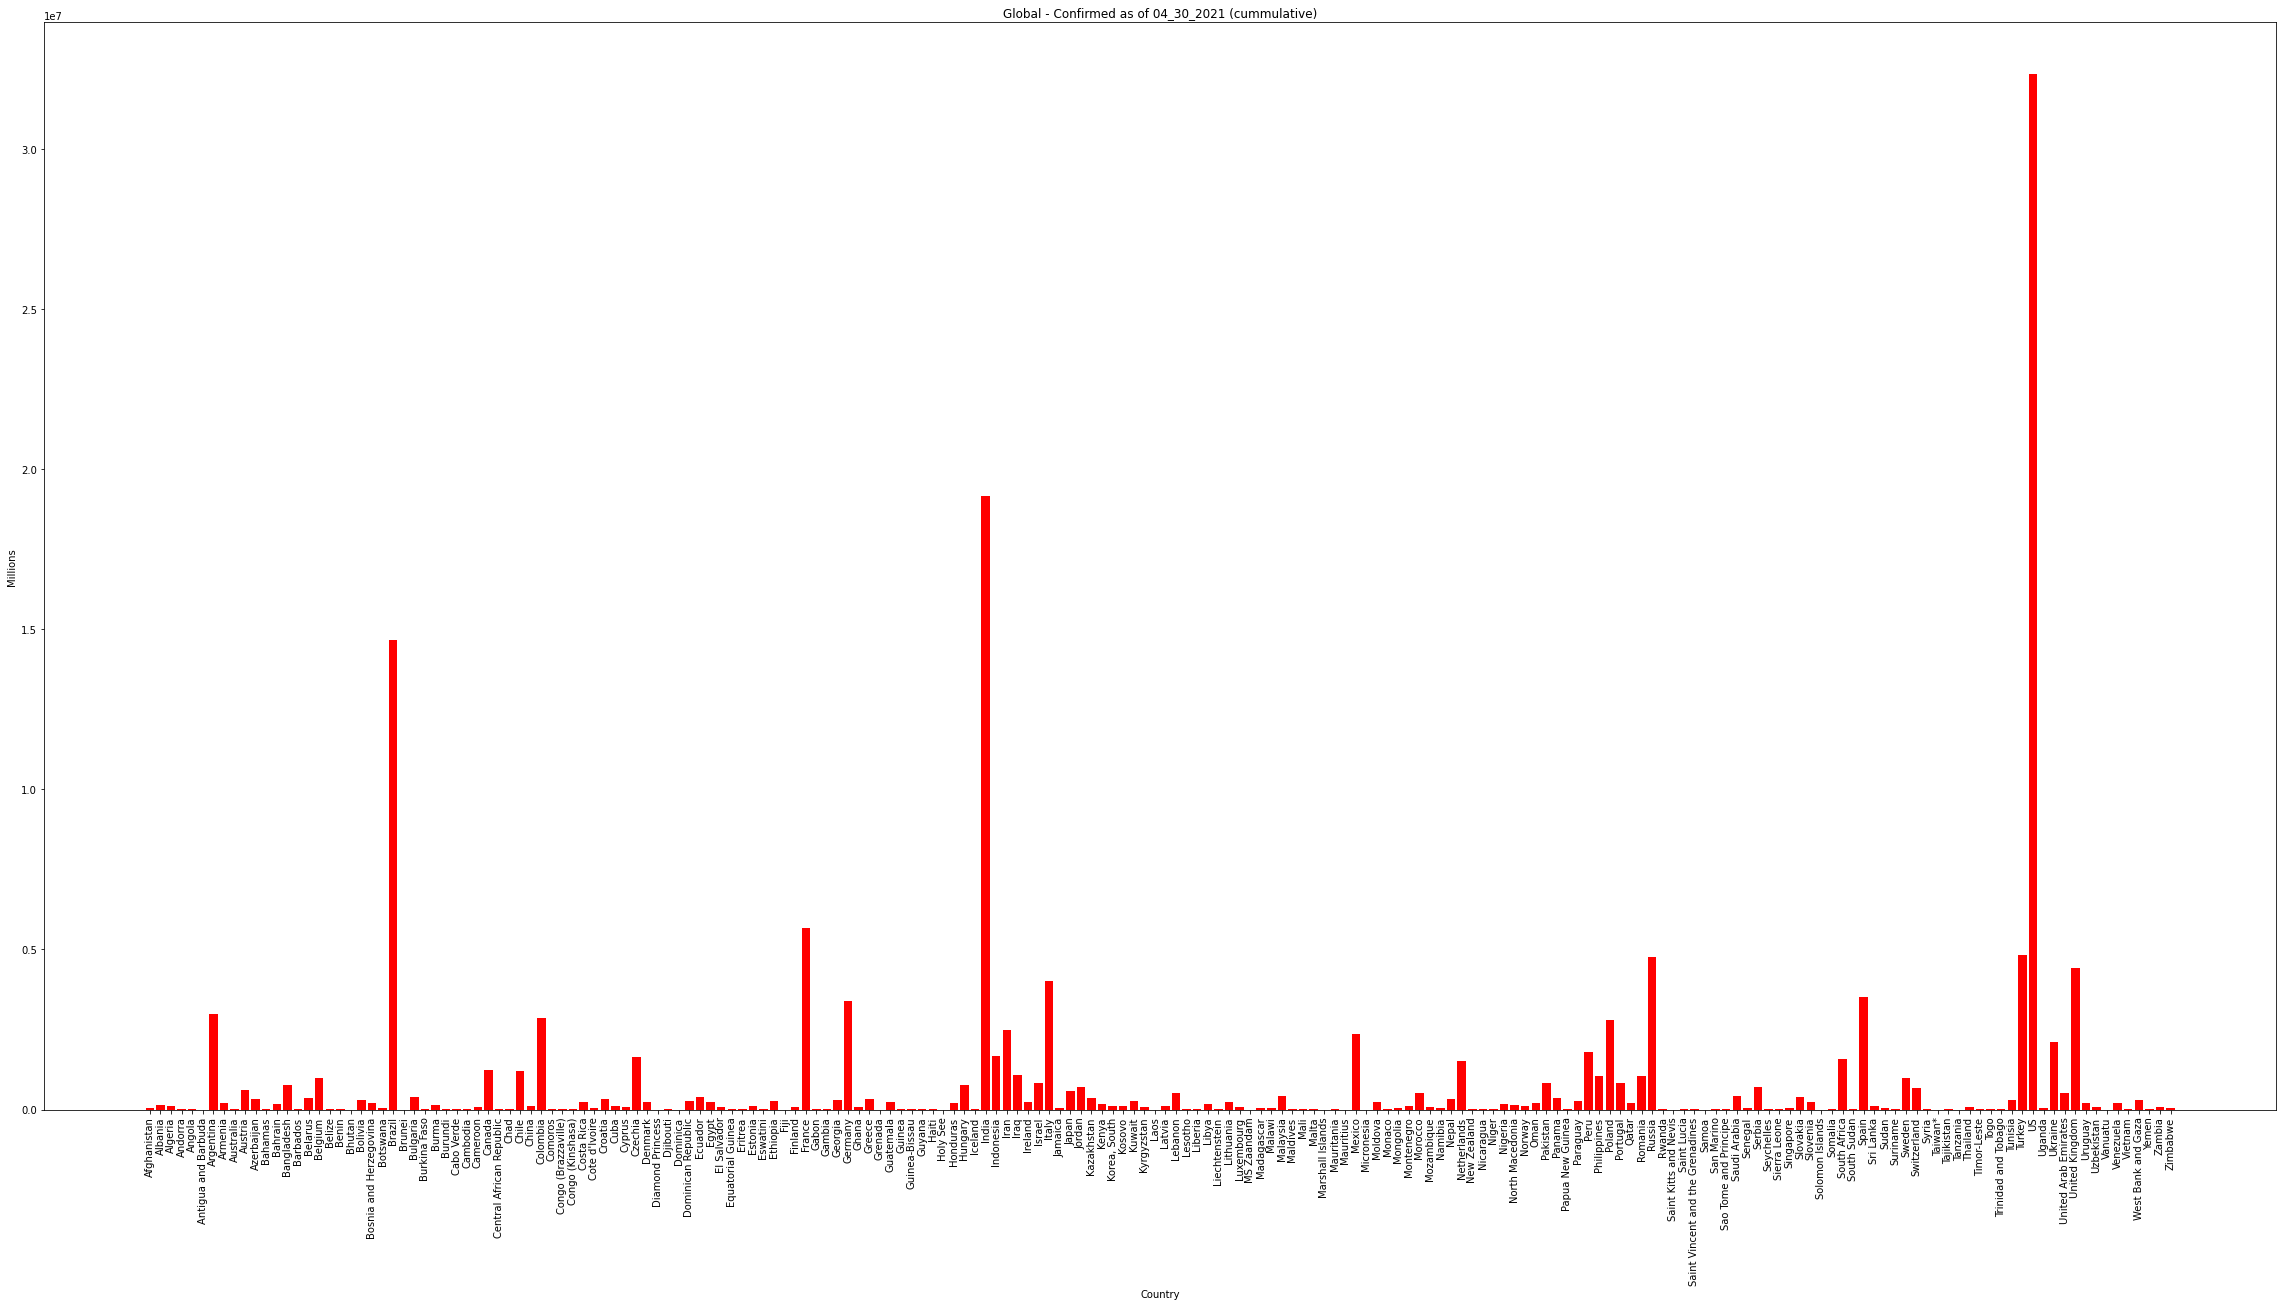

In [59]:
plt.figure(figsize=(40,20))
y_axis = confirmed_19_df_by_country[filt]["Confirmed"]
x_axis = confirmed_19_df_by_country[filt]["Country/Region"]
plt.bar(x_axis, y_axis, color='r', alpha=1.0, align="center")
plt.xlabel("Country")
plt.ylabel("Millions")
plt.title("Global - Confirmed as of 04_30_2021 (cummulative)")
plt.xticks(rotation = 90)
# plt.plot(confirmed_19_df_by_date_active)
# plt.legend(["Confirmed"], loc = "upper left")
# plt.xlim(0, 100000)
# plt.ylim(-1, 1)
plt.show()

In [60]:
# confirmed_19_df_by_country.index.list_values == ['2021-04-30']
filt = (confirmed_19_df_by_country["Date"] == "2021-04-30") & (confirmed_19_df_by_country["Confirmed"] >= 1000000)
confirmed_19_df_by_country[filt].sort_values(by = "Confirmed", ascending = False)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
89264,2021-04-30,US,32346971,576397,0.0,31770574.0,57922,743,0
89165,2021-04-30,India,19164969,211853,15684406.0,3268710.0,401993,3523,299988
89109,2021-04-30,Brazil,14659011,403781,12991951.0,1263279.0,68333,2595,49870
89148,2021-04-30,France,5677835,104675,346480.0,5226680.0,24302,290,1650
89263,2021-04-30,Turkey,4820591,40131,4323897.0,456563.0,31891,394,68183
89228,2021-04-30,Russia,4750755,108290,4377504.0,264961.0,8613,388,8290
89268,2021-04-30,United Kingdom,4432246,127775,14683.0,4289788.0,2397,16,25
89171,2021-04-30,Italy,4022653,120807,3465576.0,436270.0,13445,263,15621
89248,2021-04-30,Spain,3524077,78216,150376.0,3295485.0,9135,136,0
89152,2021-04-30,Germany,3405365,83097,3008640.0,313628.0,14326,232,20730


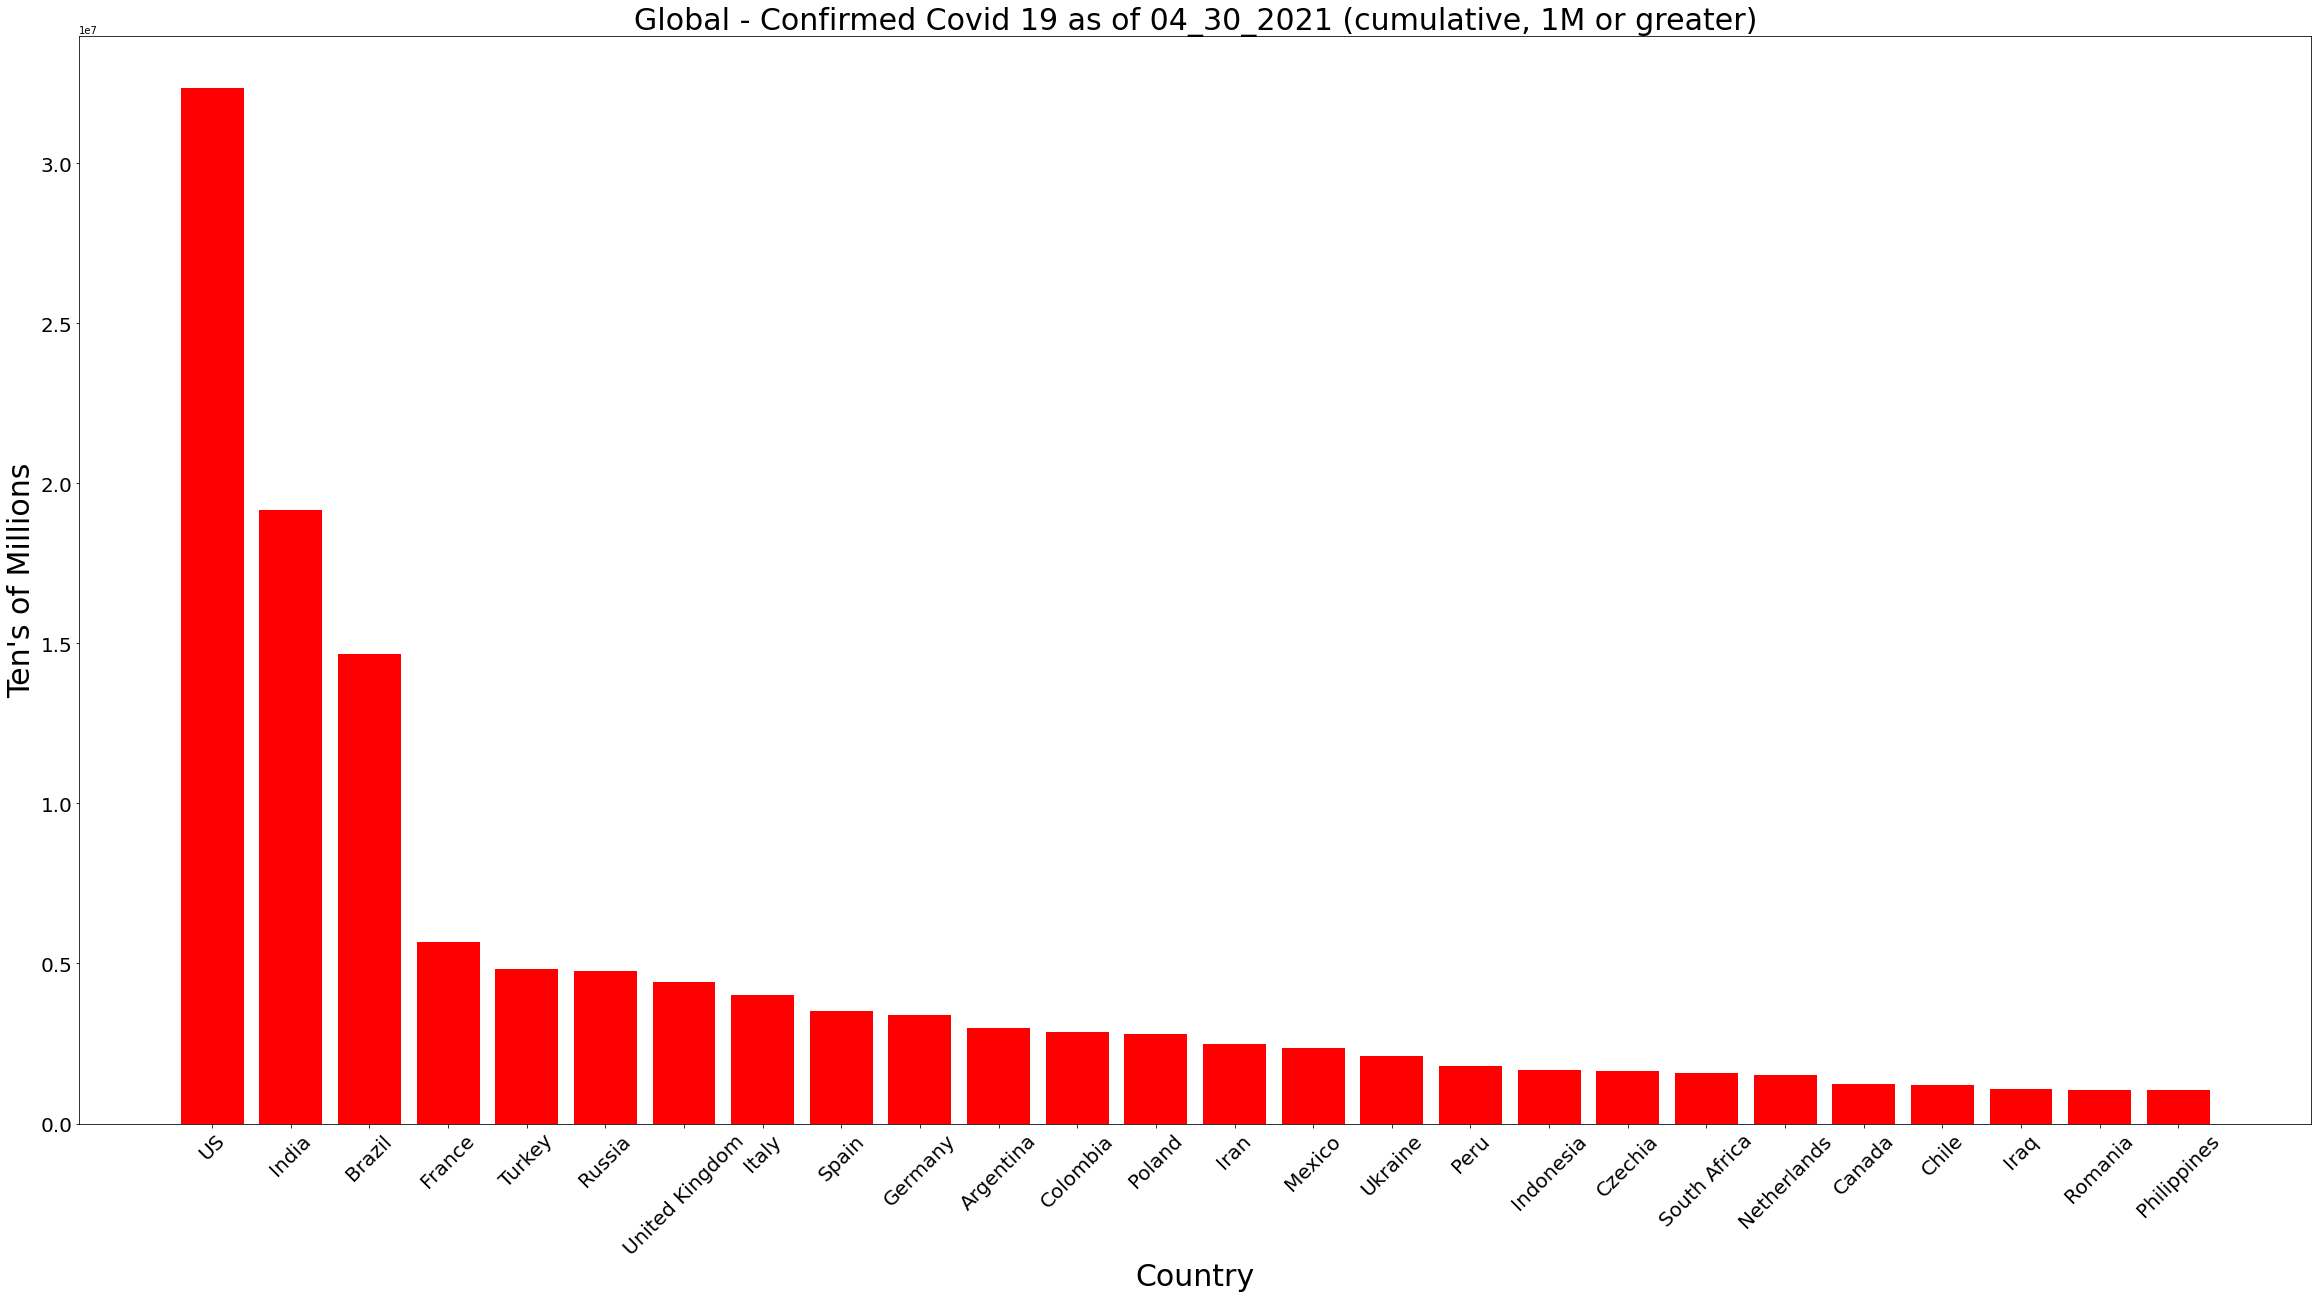

In [61]:
# confirmed_19_df_by_country[filt].sort_values(by = "Confirmed", ascending = False)
plt.figure(figsize=(40,20))
# plt.figure.subplots_adjust(left=0.115, right=0.88)
y_axis = confirmed_19_df_by_country[filt].sort_values(by = "Confirmed", ascending = False)["Confirmed"]
x_axis = confirmed_19_df_by_country[filt].sort_values(by = "Confirmed", ascending = False)["Country/Region"]
pos = np.arange(len(x_axis))
# x_pos = [0]
# x_axis.margins(0.01, 0)
plt.bar(x_axis, y_axis, width = 0.8, color='r', alpha=1.0, align="center")
plt.xlabel("Country", fontsize = 30)
plt.ylabel("Ten's of Millions", fontsize = 30)
plt.title("Global - Confirmed Covid 19 as of 04_30_2021 (cumulative, 1M or greater)", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [62]:
plt.savefig("global_confirmed_cummulative_by_country_1M_or_greater.png")

<Figure size 432x288 with 0 Axes>

In [63]:
filt2 = (confirmed_19_df_by_country["Date"] == "2021-04-30") & (confirmed_19_df_by_country["Confirmed"] >= 0) & (confirmed_19_df_by_country["Confirmed"] < 600                                                                                                              )
confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)



,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
89257,2021-04-30,Tanzania,509,21,183.0,305.0,0,0,0
89110,2021-04-30,Brunei,224,3,215.0,6.0,0,0,0
89136,2021-04-30,Dominica,174,0,172.0,2.0,0,0,0
89155,2021-04-30,Grenada,160,1,158.0,1.0,0,0,0
89146,2021-04-30,Fiji,117,2,65.0,50.0,1,0,0
89230,2021-04-30,Saint Kitts and Nevis,44,0,44.0,0.0,0,0,0
89161,2021-04-30,Holy See,27,0,15.0,12.0,0,0,0
89244,2021-04-30,Solomon Islands,20,0,20.0,0.0,0,0,0
89190,2021-04-30,MS Zaandam,9,2,7.0,0.0,0,0,0
89197,2021-04-30,Marshall Islands,4,0,4.0,0.0,0,0,0


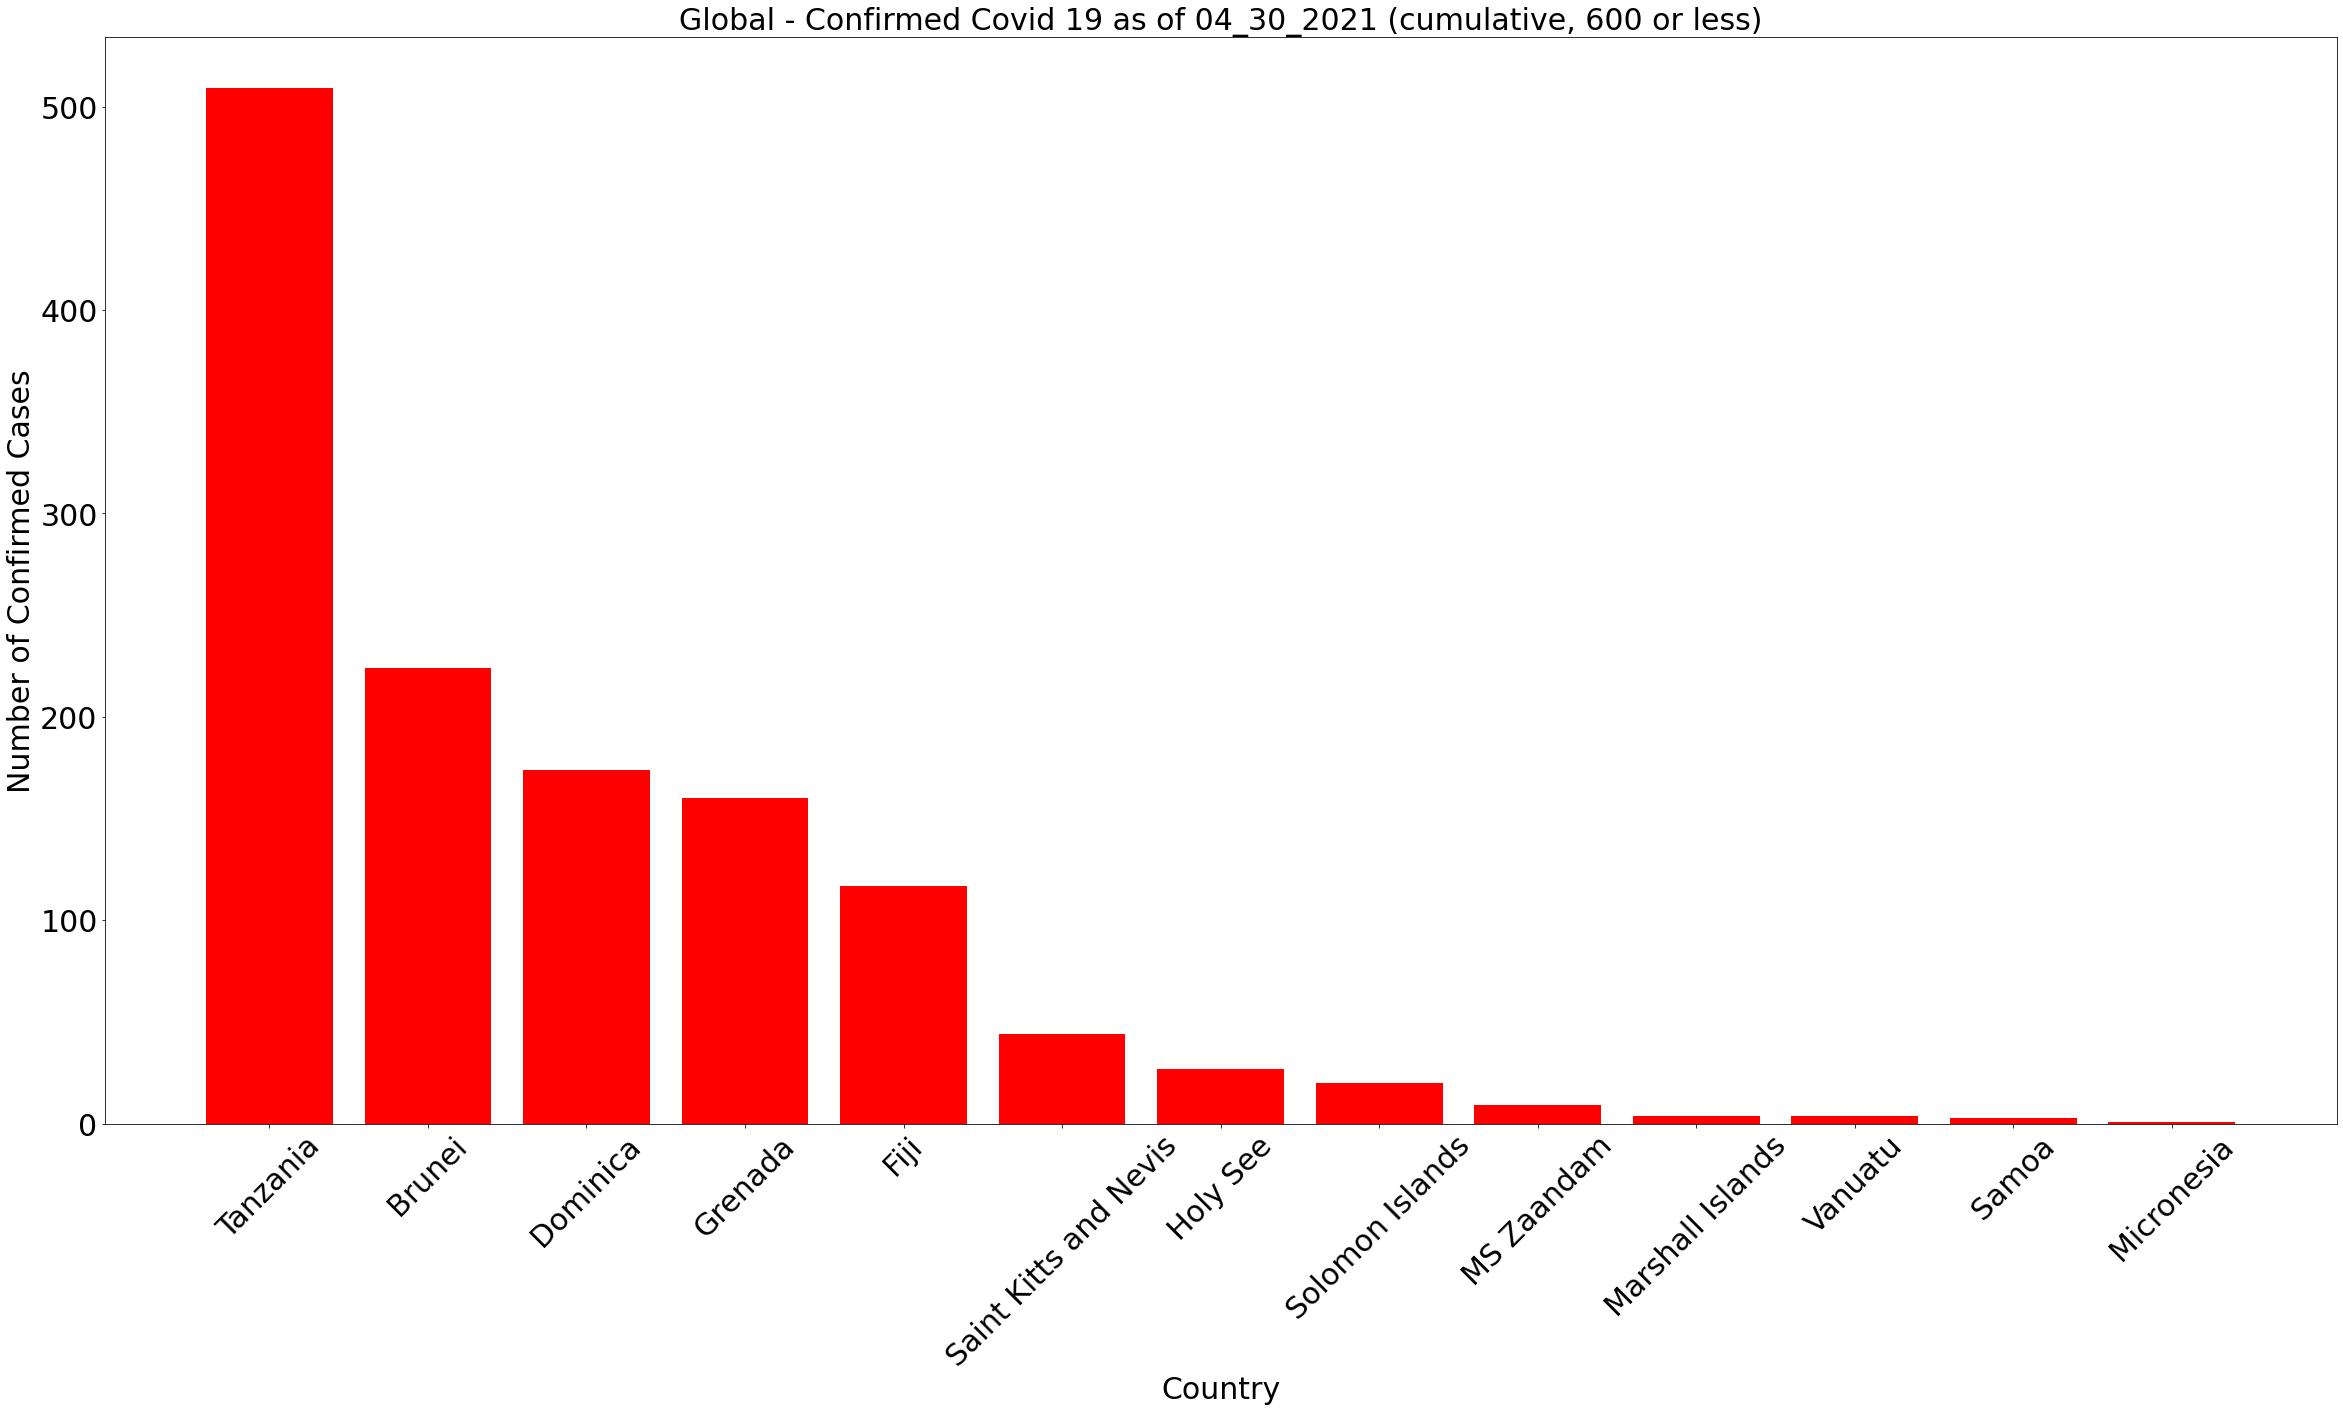

In [64]:
confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)
# confirmed_19_df_by_country[filt].sort_values(by = "Confirmed", ascending = False)
plt.figure(figsize=(40,20))
# plt.figure.subplots_adjust(left=0.115, right=0.88)
y_axis = confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)["Confirmed"]
x_axis = confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)["Country/Region"]
pos = np.arange(len(x_axis))
# x_pos = [0]
# x_axis.margins(0.01, 0)
plt.bar(x_axis, y_axis, width = 0.8, color='r', alpha=1.0, align="center")
plt.xlabel("Country", fontsize = 30)
plt.ylabel("Number of Confirmed Cases", fontsize = 30)
plt.title("Global - Confirmed Covid 19 as of 04_30_2021 (cumulative, 600 or less)", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

In [65]:
# confirmed_19_df_by_country.index.list_values == ['2020-01-22']
filt2 = (confirmed_19_df_by_country["Date"] == "2020-01-22") & (confirmed_19_df_by_country["Confirmed"] >= 1)
confirmed_19_df_by_country[filt2]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
36,2020-01-22,China,548,17,28.0,503.0,0,0,0
86,2020-01-22,Japan,2,0,0.0,2.0,0,0,0
90,2020-01-22,"Korea, South",1,0,0.0,1.0,0,0,0
167,2020-01-22,Taiwan*,1,0,0.0,1.0,0,0,0
170,2020-01-22,Thailand,4,0,2.0,2.0,0,0,0
176,2020-01-22,US,1,0,0.0,1.0,0,0,0


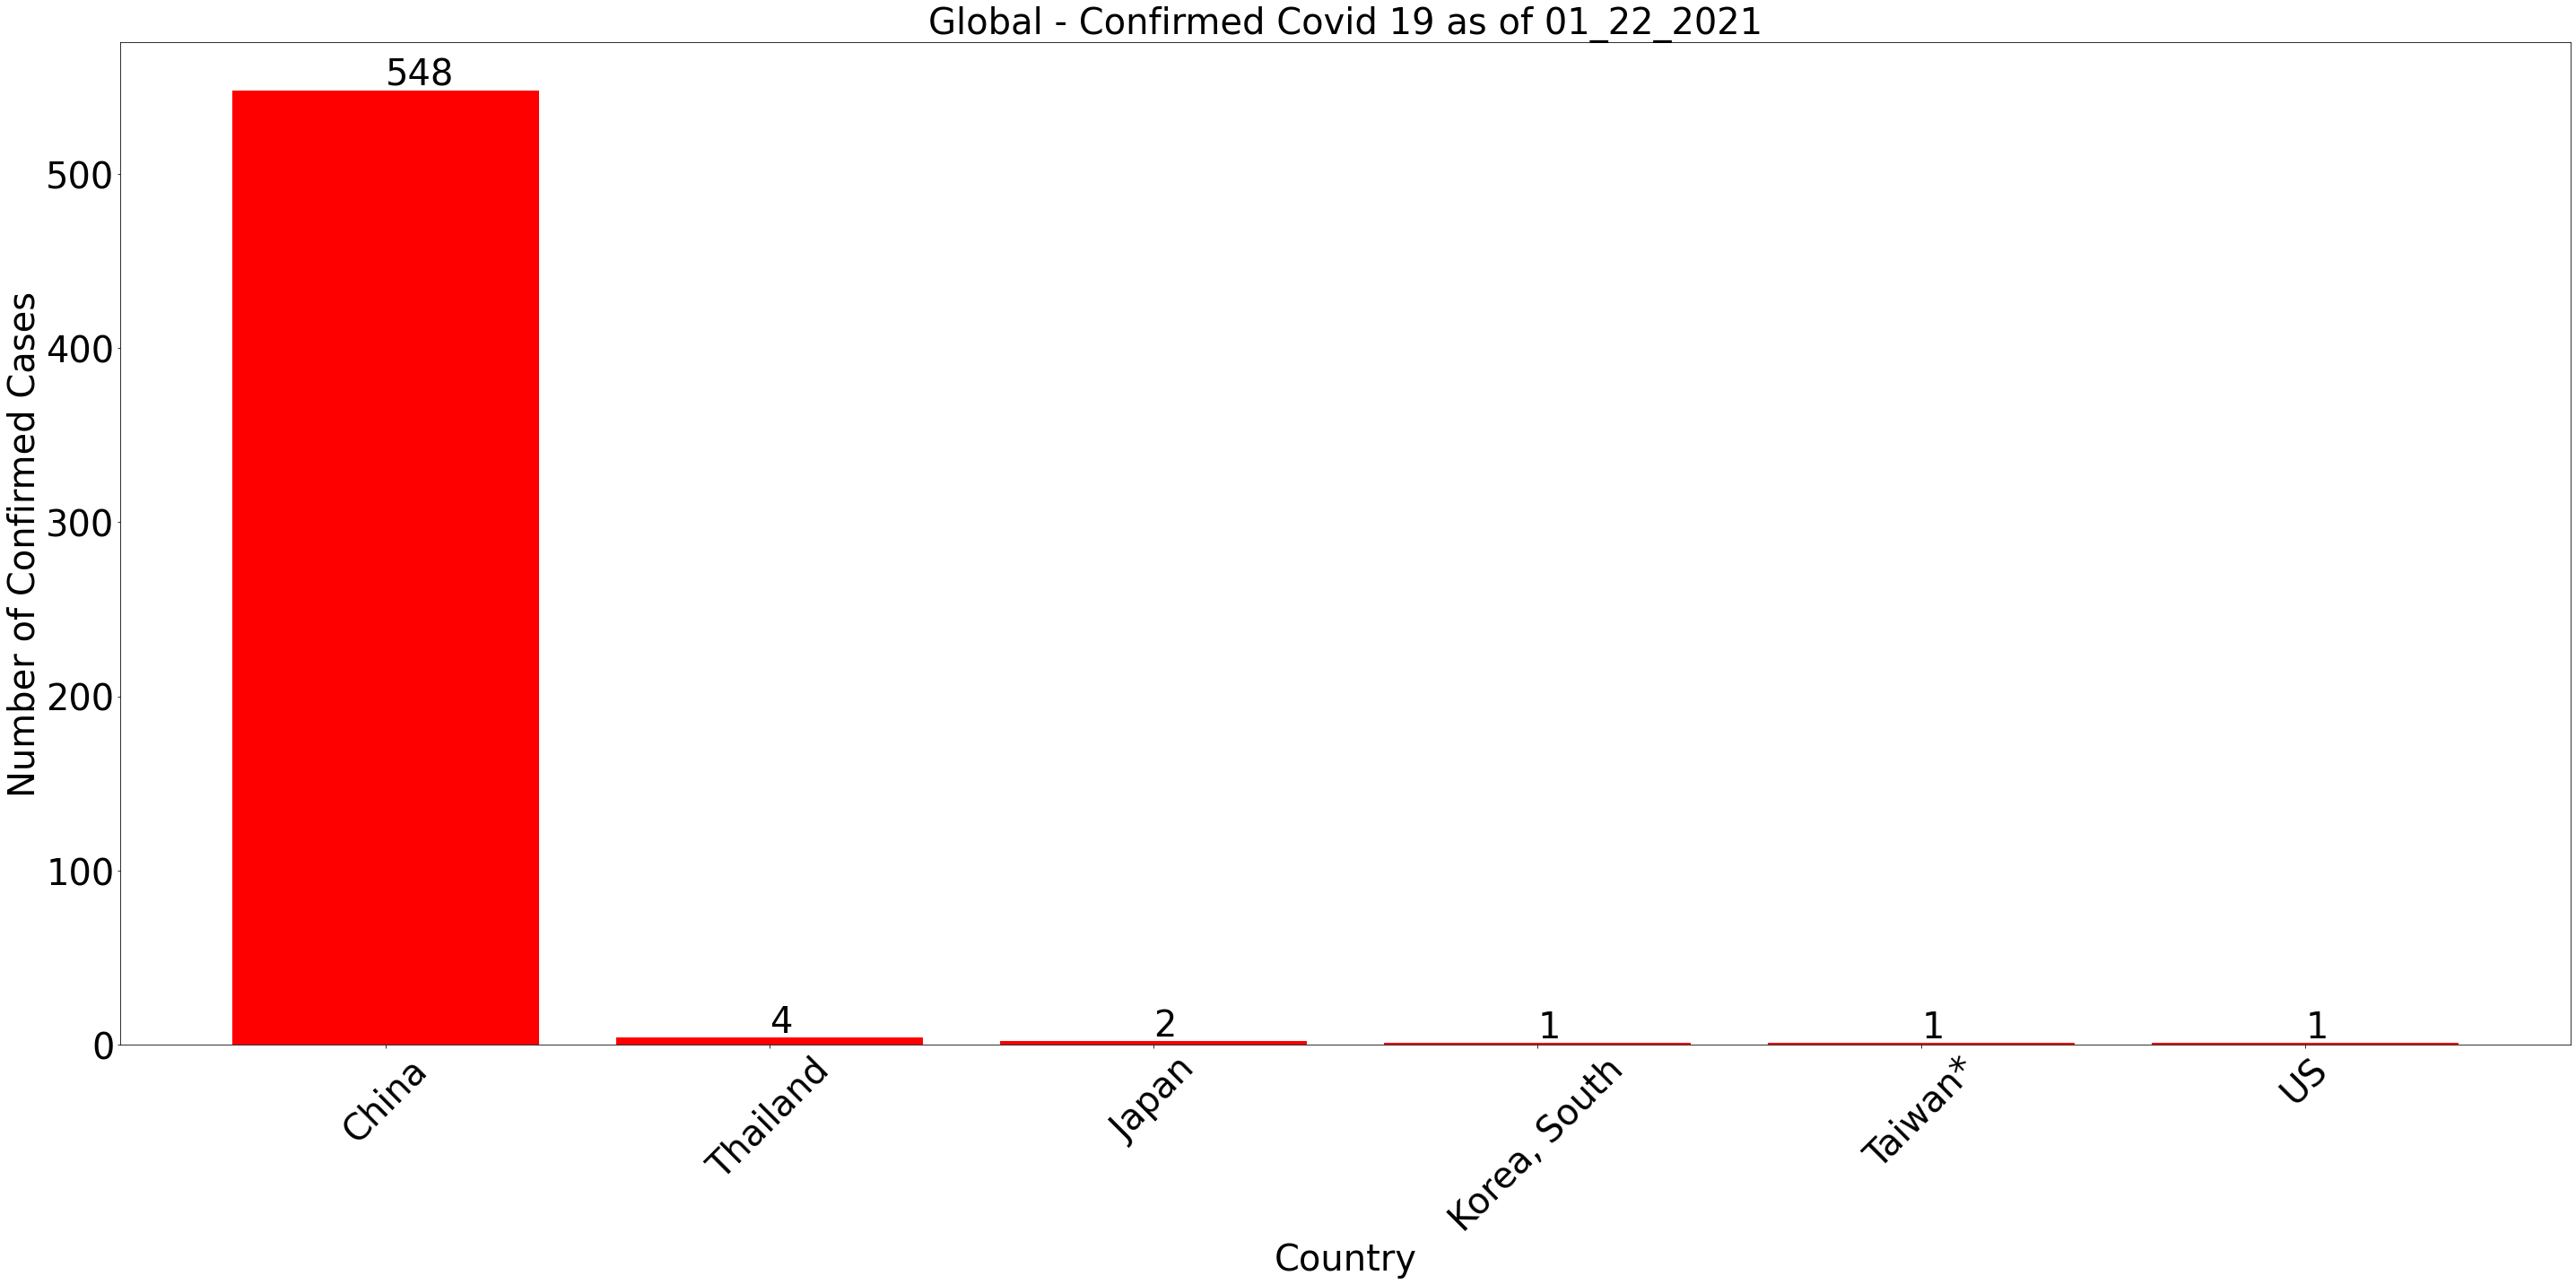

In [97]:
confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)
y_axis = confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)["Confirmed"]
x_axis = confirmed_19_df_by_country[filt2].sort_values(by = "Confirmed", ascending = False)["Country/Region"]

plt.figure(figsize=(40,20))
plt.bar(x_axis, y_axis, width = 0.8, color='r', alpha=1.0, align="center")
plt.xlabel("Country", fontsize = 40)
plt.ylabel("Number of Confirmed Cases", fontsize = 40)
plt.title("Global - Confirmed Covid 19 as of 01_22_2021", fontsize = 40)
plt.xticks(rotation = 45, fontsize = 40)
plt.yticks(fontsize = 40)

for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+3 , s=f"{data}" , fontdict=dict(fontsize=40))    
        
plt.tight_layout()
plt.show()

In [98]:
plt.savefig("global_confirmed_day_01_22_2020.png")

<Figure size 432x288 with 0 Axes>